

# **Building a Convolutional Neural Network with TensorFlow.**
 
 

> Foundations of Machine Learning (ENEE436/ENTS669D) - Spring 2022

> Prof. Behtash Babadi, ECE, UMD

Author: Christos Mavridis (<mavridis@umd.edu>)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. 

<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>

More info: http://yann.lecun.com/exdb/mnist/

## Load MNIST Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
import distutils
import pandas as pd
if distutils.version.LooseVersion(tf.__version__) <= '2.0':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train0 = y_train
y_test0= y_test

# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


print(f'Input image dimension: {x_train.shape[1:]}')

#Run this cell before any other

11501568/11490434 [==============================] - 0s 0us/step
Input image dimension: (28, 28, 1)


# Why CNN?

### CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

### Convolutions

- Reduce number of weights (weight sharing, Toeplitz matrix)
- Learn linear time-invariant systems (convolutional filters) which were typically used ad-hoc as pre-processing steps and required domain knowledge (e.g. Laplacian filters = edge detectors in images)
- Output size (1D): n-m+1 (n:input size, m:filter size)

<img width="512" alt="MnistExamples" src="https://miro.medium.com/max/2880/0*QS1ArBEUJjjySXhE.png"/>

### Pooling

- Dimensionality reduction
- Build hierarchy 

<img width="512" alt="MnistExamples" src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png"/>


### Activation functions

<img width="512" alt="MnistExamples" src="https://miro.medium.com/max/2800/0*44z992IXd9rqyIWk.png"/>

### Softmax --> Gibbs (Boltzmann) distr. --> Probabilities

<img width="512" alt="MnistExamples" src="https://www.andreaperlato.com/img/softmaxfunction.png"/>




### Automatic feature extraction

<img width="512" alt="MnistExamples" src="https://miro.medium.com/max/616/1*Uhr-4VDJD0-gnteUNFzZTw.jpeg"/>



## Building a CNN: Example of LeNet5



![CNN](https://cdn-images-1.medium.com/max/800/0*V1vb9SDnsU1eZQUy.jpg)

#### MNIST Input
    32x32x1 pixels image

#### Architecture
* **Convolutional #1** 
    * Filters: 6
    * Filter size: 5x5 
    * --> Output 28x28x6
    * Activation: `relu`

* **Pooling #1** 
    * The output shape should be 14x14x6.

* **Convolutional #2** 

* **Pooling #2** 

* **Fully Connected #1** outputs 120
    
* **Fully Connected #2** outputs 84
    
* **Fully Connected #3** output 10 (# classes)





## Custom CNN Design

#### MNIST Input
    28x28x1 pixels image



In [ ]:
def myCNN():
  
  model = tf.keras.models.Sequential()

  # First Layer
  model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu',input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  # Second Layer
  model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  model.add(tf.keras.layers.Flatten())

  # Fully-connected NNs
  model.add(tf.keras.layers.Dense(units=120, activation='relu'))
  model.add(tf.keras.layers.Dense(units=84, activation='relu'))
  model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
  
  return model

print('Model Structure & Parameters:')
model = myCNN()
model.summary()

Model Structure & Parameters:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)            

# Optimization Parameters

- Stochastic Gradient Descent

<img width="512" alt="MnistExamples" src="https://miro.medium.com/max/425/1*m1KQOLl-qB0mgRq_IWivnQ.png"/>

- Adaptive momentum method (Adam)

<img width="256" alt="MnistExamples" src="https://miro.medium.com/max/380/1*Ti-cvetTBXnTsM6rHUhmlg.png"/>

- Race to global minima

<img width="512" alt="MnistExamples" src="https://miro.medium.com/max/700/1*m7-otgfbxiAvSipInHliXw.gif"/>






In [ ]:
# Training Parameters
EPOCHS = 2 #10
BATCH_SIZE = 256 #128 

# Loss Function
loss_fn = tf.keras.losses.categorical_crossentropy
# Why don't you try these as well?
# loss_fn = tf.keras.losses.MeanSquaredError()
# loss_fn = tf.keras.losses.Hinge()

# Optimization Method
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
# Why don't you try these as well?
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
# tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07)

model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
if loss_fn == tf.keras.losses.categorical_crossentropy:
    y_train = tf.keras.utils.to_categorical(y_train0)
    y_test = tf.keras.utils.to_categorical(y_test0)

# Training Loop and Testing Results

In [ ]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose = 1) # Verbose controls the output frequency during training



train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

Epoch 1/2
235/235 [==============================] - 28s 115ms/step - loss: 0.4190 - accuracy: 0.8814
Epoch 2/2
313/313 [==============================] - 3s 8ms/step - loss: 0.0733 - accuracy: 0.9774
Train accuracy: 0.9762833118438721
Test accuracy: 0.977400004863739


In [ ]:
#My  new code to generate data and such

#Just alter the number of features in each conv layer
#This code will cycle through number of CNN features and put data into a csv

convfeats1 = [1,3,5,6,7,9,11]
convfeats2 = [12,15,16,17,19,21,25]

df = pd.DataFrame(columns = ["Conv Features Layer 1","Conv Features Layer 2",
                             "Train Loss", "Train Accuracy","Test Loss",
                             "Test Accuracy"])

for feat1 in convfeats1:

  for feat2 in convfeats2:

    model = tf.keras.models.Sequential()

    # First Layer
    model.add(tf.keras.layers.Conv2D(filters=feat1, kernel_size=(5, 5), activation='relu',input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
    # Second Layer
    model.add(tf.keras.layers.Conv2D(filters=feat2, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
    model.add(tf.keras.layers.Flatten())

    # Fully-connected NNs
    model.add(tf.keras.layers.Dense(units=120, activation='relu'))
    model.add(tf.keras.layers.Dense(units=84, activation='relu'))
    model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

    #loss func
    loss_fn = tf.keras.losses.categorical_crossentropy

    #optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)

    model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
    if loss_fn == tf.keras.losses.categorical_crossentropy:
      y_train = tf.keras.utils.to_categorical(y_train0)
      y_test = tf.keras.utils.to_categorical(y_test0)
    
    model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose = 1) # Verbose controls the output frequency during training

    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test)

    newdf = pd.DataFrame([[feat1,feat2,train_loss,train_acc,test_loss,test_acc]]
                         ,columns = df.columns)
    
    df = pd.concat([df,newdf],axis = 0, ignore_index= True)

df.to_csv('convdata1.csv')


Epoch 1/2
235/235 [==============================] - 16s 68ms/step - loss: 0.5431 - accuracy: 0.8512
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.1149 - accuracy: 0.9657
Epoch 1/2
235/235 [==============================] - 18s 74ms/step - loss: 0.5621 - accuracy: 0.8504
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.1107 - accuracy: 0.9663
Epoch 1/2
235/235 [==============================] - 17s 68ms/step - loss: 0.4799 - accuracy: 0.8682
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.1091 - accuracy: 0.9664
Epoch 1/2
235/235 [==============================] - 17s 69ms/step - loss: 0.5662 - accuracy: 0.8383
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.1194 - accuracy: 0.9617
Epoch 1/2
235/235 [==============================] - 16s 67ms/step - loss: 0.5837 - accuracy: 0.8284
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.1211 - accuracy: 0.9616


In [ ]:
#My  new code to generate data and such

#Just alter the optimizer and parameters
#This code will alter the optimizer and learning rate and will create a csv file
#With all the relevant data

optimizer = range(1,9)
learningrate = np.logspace(-3,-.5,6)

dfhist = pd.DataFrame()
dffinal = pd.DataFrame(index = ["TrainLoss","TrainAcc","TestLoss","TestAcc"])

model = tf.keras.models.Sequential()

# First Layer
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu',input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Second Layer
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
model.add(tf.keras.layers.Flatten())

# Fully-connected NNs
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

#loss func
loss_fn = tf.keras.losses.categorical_crossentropy

weights = model.get_weights()


for num in optimizer:

  for rate in learningrate:

    model.set_weights(weights)

    #optimizer depends on type
    if(num == 1):
      optimizer = tf.keras.optimizers.Adam(learning_rate= rate,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    elif(num == 2):
      optimizer =  tf.keras.optimizers.SGD(learning_rate= rate, momentum=0.0, nesterov=False)
    elif(num == 3):
      optimizer =  tf.keras.optimizers.Adagrad(learning_rate= rate,initial_accumulator_value=0.1,epsilon=1e-07)
    elif(num == 4):
      optimizer =  tf.keras.optimizers.RMSprop(learning_rate = rate)
    elif(num == 5):
      optimizer =  tf.keras.optimizers.Adadelta(learning_rate = rate)
    elif(num == 6):
      optimizer =  tf.keras.optimizers.Adamax(learning_rate = rate)
    elif(num == 7):
      optimizer =  tf.keras.optimizers.Nadam(learning_rate = rate)
    else:
      optimizer =  tf.keras.optimizers.Ftrl(learning_rate = rate)

    model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
    if loss_fn == tf.keras.losses.categorical_crossentropy:
      y_train = tf.keras.utils.to_categorical(y_train0)
      y_test = tf.keras.utils.to_categorical(y_test0)
    
    model.fit(x_train, y_train,
          batch_size=512,
          epochs=5,
          validation_data = (x_test,y_test),
          verbose = 1) # Verbose controls the output frequency during training

    

    optimizerName = "Ftrl"

    if(num == 1):
      optimizerName = "Adam"
    elif(num == 2):
      optimizerName = "SGD"
    elif(num == 3):
      optimizerName = "Adagrad"
    elif(num == 4):
      optimizerName = "RMSprop"
    elif(num == 5):
      optimizerName = "Adadelta"
    elif(num == 6):
      optimizerName = "Adamax"
    elif(num == 7):
      optimizerName = "Nadam"
    else:
      optimizerName = "Ftrl"

    lst = model.history.history["loss"]
    lst.reverse()

    dfhist[(optimizerName,rate,"Training Loss")] = lst
    
    lst = model.history.history["accuracy"]
    lst.reverse()
    
    dfhist[(optimizerName,rate,"Training Accuracy")] = lst

    lst = model.history.history["val_loss"]
    lst.reverse()

    dfhist[(optimizerName,rate,"Validation Loss")] = lst
    
    lst = model.history.history["val_accuracy"]
    lst.reverse()
    
    dfhist[(optimizerName,rate,"Validation Accuracy")] = lst

    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test)

    dffinal[(optimizerName,rate)] = [train_loss,train_acc,test_loss,test_acc]
    

dfhist.to_csv('hist.csv')
dffinal.to_csv('final.csv')


Epoch 1/5
118/118 [==============================] - 21s 170ms/step - loss: 0.6923 - accuracy: 0.8231 - val_loss: 0.1765 - val_accuracy: 0.9463
Epoch 2/5
118/118 [==============================] - 20s 167ms/step - loss: 0.1396 - accuracy: 0.9579 - val_loss: 0.0936 - val_accuracy: 0.9709
Epoch 3/5
118/118 [==============================] - 20s 171ms/step - loss: 0.0974 - accuracy: 0.9703 - val_loss: 0.0734 - val_accuracy: 0.9760
Epoch 4/5
118/118 [==============================] - 20s 169ms/step - loss: 0.0742 - accuracy: 0.9769 - val_loss: 0.0608 - val_accuracy: 0.9808
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0519 - accuracy: 0.9831
Epoch 1/5
118/118 [==============================] - 21s 173ms/step - loss: 0.3905 - accuracy: 0.8871 - val_loss: 0.0965 - val_accuracy: 0.9679
Epoch 2/5
118/118 [==============================] - 20s 170ms/step - loss: 0.0836 - accuracy: 0.9749 - val_loss: 0.0636 - val_accuracy: 0.9805
Epoch 3/5
118/118 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, 

313/313 [==============================] - 2s 7ms/step - loss: 2.2739 - accuracy: 0.1589
Epoch 1/5
118/118 [==============================] - 20s 163ms/step - loss: 2.2968 - accuracy: 0.0968 - val_loss: 2.2876 - val_accuracy: 0.1074
Epoch 2/5
118/118 [==============================] - 19s 163ms/step - loss: 2.2777 - accuracy: 0.1412 - val_loss: 2.2653 - val_accuracy: 0.2055
Epoch 3/5
118/118 [==============================] - 19s 163ms/step - loss: 2.2500 - accuracy: 0.2794 - val_loss: 2.2288 - val_accuracy: 0.3626
Epoch 4/5
118/118 [==============================] - 19s 163ms/step - loss: 2.1982 - accuracy: 0.4184 - val_loss: 2.1522 - val_accuracy: 0.4930
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.9602 - accuracy: 0.6032
Epoch 1/5
118/118 [==============================] - 20s 165ms/step - loss: 2.2753 - accuracy: 0.1786 - val_loss: 2.2294 - val_accuracy: 0.3697
Epoch 2/5
118/118 [==============================] - 19s 165ms/step - loss: 2.0234 - accurac

In [ ]:
"""
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split = .1,
          verbose = 1)
"""

print(dfhist)


   (Adam, 0.001, Training Loss)  (Adam, 0.001, Training Accuracy)  \
0                      0.324658                            0.9063   

   (Adam, 0.001, Validation Loss)  (Adam, 0.001, Validation Accuracy)  
0                        0.096332                              0.9695  


In [ ]:
print(model.history.history)

df = pd.DataFrame()
df2 = pd.DataFrame()
lst = model.history.history["loss"]
lst.reverse()
df[("optimizer","rate","loss")] = lst

df2[("optimizer","rate")] = [1,2,3,4]


print(df)

{}


KeyError: ignored

## Plot Prediction and Network Output

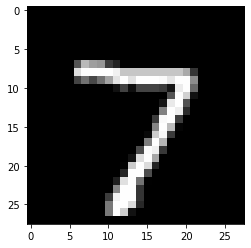

Network prediction: 7
Network Output: [6.8719248e-07 2.1010560e-07 1.6415802e-04 6.8870082e-05 3.7615578e-08
 2.2365189e-06 2.7995849e-11 9.9974877e-01 6.0050970e-06 9.0470494e-06]


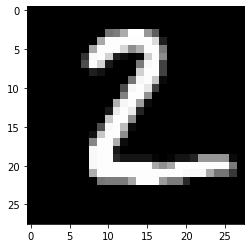

Network prediction: 2
Network Output: [7.3275354e-05 4.7033641e-04 9.9931335e-01 1.3596324e-04 9.0491387e-10
 6.7844866e-07 1.5558460e-07 3.2796588e-09 6.2710501e-06 9.0346175e-10]


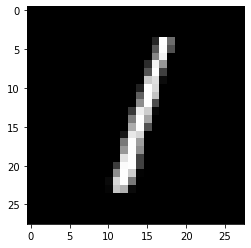

Network prediction: 1
Network Output: [4.4673790e-05 9.9867356e-01 1.5157984e-04 2.4063715e-05 4.8875512e-04
 1.0814914e-05 1.9844124e-04 9.5495692e-05 2.9402963e-04 1.8622628e-05]


In [ ]:
n_images = 3
outs = list(model.predict(x_test[:n_images,:,:,:]))
preds = list(np.argmax(model.predict(x_test[:n_images,:,:,:]), axis=-1))

# Display
for i in range(n_images):
    plt.imshow(x_test[i,:,:,0], cmap='gray')
    plt.show()
    print("Network prediction:", preds[i])
    print("Network Output:", outs[i])

# Food for thought

- Artificial Intelligence = Machine Learning = Neural Networks ???
- Moravec’s Paradox: “It is comparatively easy to make computers exhibit adult level performance on intelligence tests, playing checkers or calculating pi to a billion digits, but difficult or impossible to give them the skills of a one-year-old when it comes to perception and mobility… The mental abilities of a child that we take for granted – recognizing a face, lifting a pencil, or walking across a room – in fact solve some of the hardest engineering problems ever conceived… Encoded in the large, highly evolved sensory and motor portions of the human brain is a billion years of experience about the nature of the world and how to survive in it. ”
- AI winters: Over-promising and Under-delivering 
- AI Revolution: Has it happened yet? ([Michael I. Jordan](https://hdsr.mitpress.mit.edu/pub/wot7mkc1/release/9))